<a href="https://colab.research.google.com/github/yulanwang/twitterNLPAnalysis/blob/main/twitterCovidData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import nltk
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from pprint import pprint
import re
from nltk.tokenize import WordPunctTokenizer

In [ ]:
import sys
import os
import tweepy
from tweepy import OAuthHandler
from textblob import TextBlob
from datetime import datetime, timedelta
from IPython.display import clear_output
import matplotlib.pyplot as plt
% matplotlib inline

In [ ]:

from wordcloud import WordCloud

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Yulan_TweetsJun2021Sample/1st_junesampledata_labeled.csv")

In [ ]:
df.head

<bound method NDFrame.head of     Unnamed: 0                      created_at            id  \
0            5  Tue Jun 01 22:44:00 +0000 2021  1.400000e+18   
1           13  Tue Jun 01 22:44:01 +0000 2021  1.400000e+18   
2         1565  Tue Jun 01 22:48:57 +0000 2021  1.400000e+18   
3         1767  Tue Jun 01 22:47:13 +0000 2021  1.400000e+18   
4         1863  Tue Jun 01 22:47:20 +0000 2021  1.400000e+18   
..         ...                             ...           ...   
95      300146  Tue Jun 01 23:43:58 +0000 2021  1.400000e+18   
96       51907       2021-06-20 19:36:17+00:00  1.410000e+18   
97       52280       2021-06-20 19:36:45+00:00  1.410000e+18   
98       52287       2021-06-20 19:36:46+00:00  1.410000e+18   
99       52614       2021-06-20 19:37:10+00:00  1.410000e+18   

                                                 text  geo  coordinates place  \
0   @LBC @NickFerrariLBC No death today 3 wave ......  NaN          NaN   NaN   
1   RT @RachelBkr: The Morrison governm

In [ ]:
df.columns

Index(['Unnamed: 0', 'created_at', 'id', 'text', 'geo', 'coordinates', 'place',
       'retweet_count', 'retweeted', 'reply_count',
       'Label (1 = pro vax, 0 = anti vax)'],
      dtype='object')

{'pre_clean_len': {'description': 'Length of the tweet before cleaning',
                   'type': dtype('int64')},
 'text': {'description': 'tweet text', 'type': dtype('O')}}


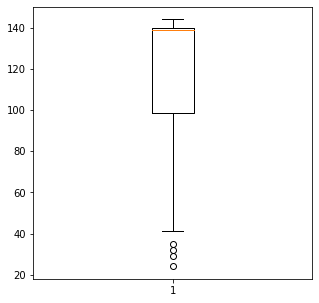

In [ ]:
df['pre_clean_len'] = [len(t) for t in df.text]
from pprint import pprint
data_dict = {
    'text':{
        'type':df.text.dtype,
        'description':'tweet text'
    },
    'pre_clean_len':{
        'type': df.pre_clean_len.dtype,
        'description':'Length of the tweet before cleaning'
    }
}

pprint(data_dict)

fig, ax = plt.subplots(figsize = (5,5))
plt.boxplot(df.pre_clean_len)
plt.show()

In [ ]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    z = re.sub('rt', " ", letters_only)
    words = [x for x  in tok.tokenize(z) if len(x) > 1]
    return (" ".join(words)).strip()

In [ ]:
testing = df.text[:50]
test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))
test_result

['no death today wave ve had vaccine',
 'the morrison government vaccine rollout is not race nonsense tells us lot about what gone wrong katharine murphy',
 'symptoms sta ed six to eight days after getting johnson johnson covid vaccine when doctors discovered blood clots',
 'glad that ll be getting second dose of astrazeneca in june those who got first dose in march eligible to book now le',
 'the last time bad science questioned the mmr vaccine children died as result the anti vaxxers aren strange curiousit',
 'meanwhile the evidence that the mrna vaccines cause myocarditis keeps piling up israel repo ed today that the risk is',
 'fuck your vaccines',
 'rick wiles the anti vaxxer who was hospitalized less than month after saying he would never get vaccinated provides',
 'so sure you said vaccines are safe and masks do not work agree on one but not the other',
 'joel kallman has died at two months after the vaccine this is becoming very sinister',
 'vaccinated nddose covaxin it is than

In [ ]:
clean_tweet_texts = []
sample = df.text
for x in sample:
    clean_tweet_texts.append(tweet_cleaner(x))
clean_tweet_texts

['no death today wave ve had vaccine',
 'the morrison government vaccine rollout is not race nonsense tells us lot about what gone wrong katharine murphy',
 'symptoms sta ed six to eight days after getting johnson johnson covid vaccine when doctors discovered blood clots',
 'glad that ll be getting second dose of astrazeneca in june those who got first dose in march eligible to book now le',
 'the last time bad science questioned the mmr vaccine children died as result the anti vaxxers aren strange curiousit',
 'meanwhile the evidence that the mrna vaccines cause myocarditis keeps piling up israel repo ed today that the risk is',
 'fuck your vaccines',
 'rick wiles the anti vaxxer who was hospitalized less than month after saying he would never get vaccinated provides',
 'so sure you said vaccines are safe and masks do not work agree on one but not the other',
 'joel kallman has died at two months after the vaccine this is becoming very sinister',
 'vaccinated nddose covaxin it is than

In [ ]:
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer

from nltk import word_tokenize, sent_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
sample_cleaned = df

In [ ]:
sample_cleaned.text = clean_tweet_texts

In [ ]:
sample_cleaned.head()

,Unnamed: 0,created_at,id,text,geo,coordinates,place,retweet_count,retweeted,reply_count,"Label (1 = pro vax, 0 = anti vax)",pre_clean_len
0,5,Tue Jun 01 22:44:00 +0000 2021,1.400000e+18,no death today wave ve had vaccine,NaN,NaN,NaN,0,False,0,1,67
1,13,Tue Jun 01 22:44:01 +0000 2021,1.400000e+18,the morrison government vaccine rollout is not...,NaN,NaN,NaN,0,False,0,1,140
2,1565,Tue Jun 01 22:48:57 +0000 2021,1.400000e+18,symptoms sta ed six to eight days after gettin...,NaN,NaN,NaN,0,False,0,0,144
3,1767,Tue Jun 01 22:47:13 +0000 2021,1.400000e+18,glad that ll be getting second dose of astraze...,NaN,NaN,NaN,0,False,0,1,140
4,1863,Tue Jun 01 22:47:20 +0000 2021,1.400000e+18,the last time bad science questioned the mmr v...,NaN,NaN,NaN,0,False,0,1,140


In [ ]:
sample_cleaned.to_csv('cleaned_jun_labeled_sample_tweets.csv')

In [ ]:
from google.colab import drive
drive.mount('drive')


Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
!cp cleaned_jun_labeled_sample_tweets.csv "drive/MyDrive/Yulan_TweetsJun2021Sample"

In [ ]:
labeled_sample_df = pd.read_csv("/content/drive/MyDrive/Yulan_TweetsJun2021Sample/cleaned_jun_labeled_sample_tweets.csv")

In [ ]:
labeled_sample_df.rename(columns = {'Label (1 = pro vax, 0 = anti vax)':'Label'}, inplace = True)

In [ ]:
labeled_sample_df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'created_at', 'id', 'text', 'geo',
       'coordinates', 'place', 'retweet_count', 'retweeted', 'reply_count',
       'Label', 'pre_clean_len'],
      dtype='object')

In [ ]:
vax_tweets = " ".join(text for text in labeled_sample_df.text)

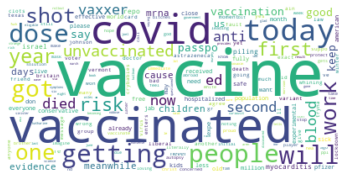

In [ ]:
# Creating word_cloud with text as argument in .generate() method

word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(vax_tweets)

# Display the generated Word Cloud

plt.imshow(word_cloud2, interpolation='bilinear')

plt.axis("off")

plt.show()

In [ ]:
pro = 1
anti = 0
pro_vax_df = labeled_sample_df[labeled_sample_df['Label'] == pro]
anti_vax_df = labeled_sample_df[labeled_sample_df['Label']== anti]


In [ ]:
pro_vax_df

,Unnamed: 0,Unnamed: 0.1,created_at,id,text,geo,coordinates,place,retweet_count,retweeted,reply_count,Label,pre_clean_len
0,0,5,Tue Jun 01 22:44:00 +0000 2021,1.400000e+18,no death today wave ve had vaccine,NaN,NaN,NaN,0,False,0,1,67
1,1,13,Tue Jun 01 22:44:01 +0000 2021,1.400000e+18,the morrison government vaccine rollout is not...,NaN,NaN,NaN,0,False,0,1,140
3,3,1767,Tue Jun 01 22:47:13 +0000 2021,1.400000e+18,glad that ll be getting second dose of astraze...,NaN,NaN,NaN,0,False,0,1,140
4,4,1863,Tue Jun 01 22:47:20 +0000 2021,1.400000e+18,the last time bad science questioned the mmr v...,NaN,NaN,NaN,0,False,0,1,140
7,7,7583,Tue Jun 01 22:57:24 +0000 2021,1.400000e+18,rick wiles the anti vaxxer who was hospitalize...,NaN,NaN,NaN,0,False,0,1,140
10,10,670896,Tue Jun 01 09:25:16 +0000 2021,1.400000e+18,vaccinated nddose covaxin it is thank you now ...,NaN,NaN,NaN,0,False,0,1,140
11,11,671395,Tue Jun 01 09:19:02 +0000 2021,1.400000e+18,omg moment group is offering free moment group...,NaN,NaN,NaN,0,False,0,1,140
13,13,1255209,Tue Jun 01 14:48:00 +0000 2021,1.400000e+18,vaccines work as vermont closes in on of our p...,NaN,NaN,NaN,0,False,0,1,140
14,14,1255794,Tue Jun 01 14:48:30 +0000 2021,1.400000e+18,stay safe everyone im vaccinated maskup,NaN,NaN,NaN,0,False,0,1,79
15,15,1255883,Tue Jun 01 14:48:35 +0000 2021,1.400000e+18,second dose btw tryna get that tracker in my a...,NaN,NaN,NaN,0,False,0,1,75


In [ ]:
pro_vax_df.to_csv('cleaned_jun_labeled_sample_pro_vax.csv')
anti_vax_df.to_csv('cleaned_jun_labeled_sample_anti_vax.csv')

!cp cleaned_jun_labeled_sample_pro_vax.csv "drive/MyDrive/Yulan_TweetsJun2021Sample"
!cp cleaned_jun_labeled_sample_anti_vax.csv "drive/MyDrive/Yulan_TweetsJun2021Sample"

Word Cloud for Provaccine tweets

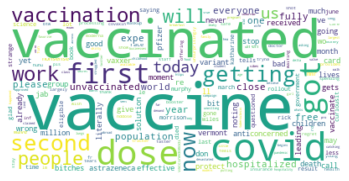

In [ ]:
pro_vax_tweets = " ".join(text for text in pro_vax_df.text)

pro_vax_wordcloud = WordCloud(collocations = False, background_color = 'white').generate(pro_vax_tweets)

plt.imshow(pro_vax_wordcloud, interpolation='bilinear')

plt.axis("off")

plt.show()

Word Cloud for Anti vaccine tweets

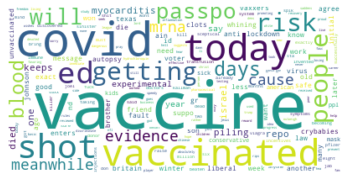

In [ ]:
anti_vax_tweets = " ".join(text for text in anti_vax_df.text)
anti_vax_wordcloud = WordCloud(collocations = False, background_color = "white").generate(anti_vax_tweets)
plt.imshow(anti_vax_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
import seaborn as sns
import os
from datetime import datetime
import seaborn as sns
import branca.colormap as cm
import requests
import folium
from folium import plugins
from folium.plugins import HeatMap
import branca.colormap
from nltk import pos_tag, ne_chunk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm import tqdm, notebook
from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# We are using Compound score to detect the tweet sentiment which is a metric that calculates the sum of
# all the lexicon ratings which have been normalized between
# -1(most extreme negative) and +1 (most extreme positive)
# positive: (compound score >= 0.05), negative : (compound score <= -0.05), neutral otherwise
sid = SentimentIntensityAnalyzer()
for index, row in tqdm(pro_vax_df.iterrows()): #tqdm
    ss = sid.polarity_scores(row['text'])
    if ss['compound'] >= 0.05 :
        pro_vax_df.at[index,'sentiment'] = "Positive"
    elif ss['compound'] <= - 0.05 :
        pro_vax_df.at[index,'sentiment'] = "Negative"
    else :
        pro_vax_df.at[index,'sentiment'] = "Neutral"

0it [00:00, ?it/s]/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
60it [00:00, 1109.97it/s]


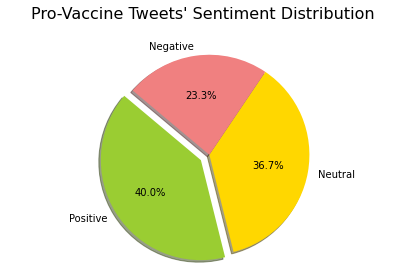

In [ ]:
# Show distribution of tweet sentiments
sentiment_dist_pro_vax = pro_vax_df.sentiment.value_counts()

plt.pie(sentiment_dist_pro_vax, labels=sentiment_dist_pro_vax.index, explode= (0.1,0,0),
        colors=['yellowgreen', 'gold', 'lightcoral'],
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Pro-Vaccine Tweets\' Sentiment Distribution \n", fontsize=16, color='Black')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
sid = SentimentIntensityAnalyzer()
for index, row in tqdm(anti_vax_df.iterrows()): #tqdm
    ss = sid.polarity_scores(row['text'])
    if ss['compound'] >= 0.05 :
        anti_vax_df.at[index,'sentiment'] = "Positive"
    elif ss['compound'] <= - 0.05 :
        anti_vax_df.at[index,'sentiment'] = "Negative"
    else :
        anti_vax_df.at[index,'sentiment'] = "Neutral"

0it [00:00, ?it/s]/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
40it [00:00, 1126.80it/s]


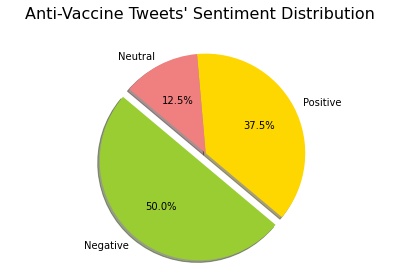

In [ ]:
sentiment_dist_anti_vax = anti_vax_df.sentiment.value_counts()

plt.pie(sentiment_dist_anti_vax, labels=sentiment_dist_anti_vax.index, explode= (0.1,0,0),
        colors=['yellowgreen', 'gold', 'lightcoral'],
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Anti-Vaccine Tweets\' Sentiment Distribution \n", fontsize=16, color='Black')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
anti_vax_df.head()

,Unnamed: 0,Unnamed: 0.1,created_at,id,text,geo,coordinates,place,retweet_count,retweeted,reply_count,Label,pre_clean_len,sentiment
2,2,1565,Tue Jun 01 22:48:57 +0000 2021,1.400000e+18,symptoms sta ed six to eight days after getting johnson johnson covid vaccine when doctors discovered blood clots,NaN,NaN,NaN,0,False,0,0,144,Neutral
5,5,6614,Tue Jun 01 22:09:15 +0000 2021,1.400000e+18,meanwhile the evidence that the mrna vaccines cause myocarditis keeps piling up israel repo ed today that the risk is,NaN,NaN,NaN,0,False,0,0,139,Negative
6,6,7150,Tue Jun 01 22:09:52 +0000 2021,1.400000e+18,fuck your vaccines,NaN,NaN,NaN,0,False,0,0,32,Negative
8,8,7843,Tue Jun 01 22:57:44 +0000 2021,1.400000e+18,so sure you said vaccines are safe and masks do not work agree on one but not the other,NaN,NaN,NaN,0,False,0,0,94,Positive
9,9,670305,Tue Jun 01 09:05:25 +0000 2021,1.400000e+18,joel kallman has died at two months after the vaccine this is becoming very sinister,NaN,NaN,NaN,0,False,0,0,110,Negative


In [ ]:
pro_vax_df.to_csv('cleaned_jun_labeled_sample_pro_vax.csv')
anti_vax_df.to_csv('cleaned_jun_labeled_sample_anti_vax.csv')

!cp cleaned_jun_labeled_sample_pro_vax.csv "drive/MyDrive/Yulan_TweetsJun2021Sample"
!cp cleaned_jun_labeled_sample_anti_vax.csv "drive/MyDrive/Yulan_TweetsJun2021Sample"

Timeseries graph

In [ ]:
from datetime import datetime, timedelta
from dateutil.parser import parse

LDA





---



In [ ]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
!pip install pyLDAvis
import pyLDAvis

import pyLDAvis.gensim_models


# Enable logging for gensim
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

     |████████████████████████████████| 1.7 MB 5.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=a4831b5c08f8de26833480f023c39b80bc841dc7f3619c473b76904bbcac1400
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


Tokenize

In [ ]:
pro_vax_df

,Unnamed: 0,Unnamed: 0.1,created_at,id,text,geo,coordinates,place,retweet_count,retweeted,reply_count,Label,pre_clean_len,sentiment
0,0,5,Tue Jun 01 22:44:00 +0000 2021,1.400000e+18,no death today wave ve had vaccine,NaN,NaN,NaN,0,False,0,1,67,Negative
1,1,13,Tue Jun 01 22:44:01 +0000 2021,1.400000e+18,the morrison government vaccine rollout is not race nonsense tells us lot about what gone wrong katharine murphy,NaN,NaN,NaN,0,False,0,1,140,Negative
3,3,1767,Tue Jun 01 22:47:13 +0000 2021,1.400000e+18,glad that ll be getting second dose of astrazeneca in june those who got first dose in march eligible to book now le,NaN,NaN,NaN,0,False,0,1,140,Positive
4,4,1863,Tue Jun 01 22:47:20 +0000 2021,1.400000e+18,the last time bad science questioned the mmr vaccine children died as result the anti vaxxers aren strange curiousit,NaN,NaN,NaN,0,False,0,1,140,Negative
7,7,7583,Tue Jun 01 22:57:24 +0000 2021,1.400000e+18,rick wiles the anti vaxxer who was hospitalized less than month after saying he would never get vaccinated provides,NaN,NaN,NaN,0,False,0,1,140,Negative
10,10,670896,Tue Jun 01 09:25:16 +0000 2021,1.400000e+18,vaccinated nddose covaxin it is thank you now waiting for the rd dose booster shot,NaN,NaN,NaN,0,False,0,1,140,Positive
11,11,671395,Tue Jun 01 09:19:02 +0000 2021,1.400000e+18,omg moment group is offering free moment group card if you show them your vaccination card not yet vaccinated huhu moderna faster pls,NaN,NaN,NaN,0,False,0,1,140,Positive
13,13,1255209,Tue Jun 01 14:48:00 +0000 2021,1.400000e+18,vaccines work as vermont closes in on of our population vaccinated there are just people hospitalized in the,NaN,NaN,NaN,0,False,0,1,140,Neutral
14,14,1255794,Tue Jun 01 14:48:30 +0000 2021,1.400000e+18,stay safe everyone im vaccinated maskup,NaN,NaN,NaN,0,False,0,1,79,Positive
15,15,1255883,Tue Jun 01 14:48:35 +0000 2021,1.400000e+18,second dose btw tryna get that tracker in my arm fr,NaN,NaN,NaN,0,False,0,1,75,Neutral


In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

provax_words = list(sent_to_words(pro_vax_df["text"]))

print(provax_words[:2])

[['no', 'death', 'today', 'wave', 've', 'had', 'vaccine'], ['the', 'morrison', 'government', 'vaccine', 'rollout', 'is', 'not', 'race', 'nonsense', 'tells', 'us', 'lot', 'about', 'what', 'gone', 'wrong', 'katharine', 'murphy']]


 Creating Bigram and Trigram Models

In [ ]:
bigram = gensim.models.Phrases(provax_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[provax_words], threshold=100)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[provax_words[0]]])


['no', 'death', 'today', 'wave', 've', 'had', 'vaccine']


/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


 Remove Stopwords, Make Bigrams and Lemmatize

In [ ]:

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', "us", "vaccine", "go", "much", "vaccinate", "get", "btw", "http", "nee", "expe", "say", "may", "much", "first", "second", "can", "s", "go", "would", "quite", "pm", "rea", "literally","vaccination"])

In [ ]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out


In [ ]:
# Remove Stop Words
provax_words_nostops = remove_stopwords(provax_words)

# Form Bigrams
provax_words_bigrams = make_bigrams(provax_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
provax_lemmatized = lemmatization(provax_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(provax_lemmatized[:1])

[['death', 'today', 'wave']]


Create the Dictionary and Corpus needed for Topic Modeling

In [ ]:
# Create Dictionary
dict_pro_word = corpora.Dictionary(provax_lemmatized)

# Create Corpus
texts_pro = provax_lemmatized

# Term Document Frequency
pro_corpus = [dict_pro_word.doc2bow(text) for text in texts_pro]

# View
print(pro_corpus[:1])


[[(0, 1), (1, 1), (2, 1)]]


In [ ]:
[[(dict_pro_word[id], freq) for id, freq in cp] for cp in pro_corpus[:1]]

[[('death', 1), ('today', 1), ('wave', 1)]]

Building the Topic Model

In [ ]:
lda_model_pro = gensim.models.ldamodel.LdaModel(corpus=pro_corpus,
                                           id2word=dict_pro_word,
                                           num_topics=10,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

View the topics in LDA model

In [ ]:
# Print the Keyword in the 10 topics
pprint(lda_model_pro.print_topics())
doc_lda = lda_model_pro[pro_corpus]

[(0,
  '0.054*"dose" + 0.028*"think" + 0.028*"sick" + 0.028*"pretty" + 0.028*"safe" '
  '+ 0.028*"stay" + 0.028*"be" + 0.028*"take" + 0.028*"work" + '
  '0.028*"vaccinate"'),
 (1,
  '0.046*"dose" + 0.031*"covid" + 0.031*"child" + 0.016*"bad" + 0.016*"today" '
  '+ 0.016*"anti" + 0.016*"strange" + 0.016*"mmr" + 0.016*"question" + '
  '0.016*"die"'),
 (2,
  '0.038*"vaccinate" + 0.026*"vaccine" + 0.026*"covid" + 0.026*"bitch" + '
  '0.026*"people" + 0.026*"vaccinated" + 0.026*"stop" + 0.014*"year" + '
  '0.014*"effective" + 0.014*"lung"'),
 (3,
  '0.036*"get" + 0.036*"vaccinated" + 0.025*"protect" + 0.013*"vaccine" + '
  '0.013*"go" + 0.013*"dose" + 0.013*"month" + 0.013*"bit" + 0.013*"concerned" '
  '+ 0.013*"child"'),
 (4,
  '0.067*"vaccinate" + 0.054*"vaccine" + 0.041*"population" + 0.028*"fully" + '
  '0.028*"share" + 0.028*"close" + 0.028*"work" + 0.028*"people" + '
  '0.028*"hospitalize" + 0.015*"soldier"'),
 (5,
  '0.042*"group" + 0.042*"card" + 0.022*"offer" + 0.022*"pandemic" + '

Compute Model Perplexity and Coherence Score

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model_pro.log_perplexity(pro_corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model_pro, texts=provax_lemmatized, dictionary= dict_pro_word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.300724151904869

Coherence Score:  0.4533616265323891


In [ ]:
pyLDAvis.enable_notebook()
vis_pro = pyLDAvis.gensim_models.prepare(lda_model_pro, pro_corpus, dict_pro_word)
vis_pro

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.029300 -0.178243       1        1  16.321637
2     -0.077914 -0.012262       2        1  15.202157
8     -0.045578  0.052277       3        1  13.990054
4     -0.165016  0.037197       4        1  13.787572
1      0.146847  0.073963       5        1  11.614228
7      0.027725  0.026747       6        1   7.981856
5     -0.000778 -0.035063       7        1   6.866329
6      0.037411  0.026026       8        1   5.952669
9      0.033499  0.002544       9        1   4.453161
0      0.014502  0.006816      10        1   3.830337, topic_info=               Term      Freq     Total Category  logprob  loglift
12             dose  3.000000  3.000000  Default  30.0000  30.0000
127           world  1.000000  1.000000  Default  29.0000  29.0000
34        vaccinate  9.000000  9.000000  Default  28.0000  28.0000
49          vaccine  6.000000  6.000000  Default  27.0000  27.0000
224            note  1.000000  1.000000  Default  26.0000  26.0000
223            lead  1.000000  1.000000  Default  25.0000  25.0000
50             work  2.000000  2.000000  Default  24.0000  24.0000
14              get  7.000000  7.000000  Default  23.0000  23.0000
91       vaccinated  4.000000  4.000000  Default  22.0000  22.0000
65             give  1.000000  1.000000  Default  21.0000  21.0000
48       population  2.000000  2.000000  Default  20.0000  20.0000
42            group  1.000000  1.000000  Default  19.0000  19.0000
39             card  1.000000  1.000000  Default  18.0000  18.0000
77     unvaccinated  2.000000  2.000000  Default  17.0000  17.0000
0             death  1.000000  1.000000  Default  16.0000  16.0000
129           covid  4.000000  4.000000  Default  15.0000  15.0000
41             free  2.000000  2.000000  Default  14.0000  14.0000
78          variant  1.000000  1.000000  Default  13.0000  13.0000
1             today  2.000000  2.000000  Default  12.0000  12.0000
47           people  3.000000  3.000000  Default  11.0000  11.0000
18            child  2.000000  2.000000  Default  10.0000  10.0000
205         receive  1.000000  1.000000  Default   9.0000   9.0000
190           fully  2.000000  2.000000  Default   8.0000   8.0000
176           think  0.000000  0.000000  Default   7.0000   7.0000
174          pretty  0.000000  0.000000  Default   6.0000   6.0000
175            sick  0.000000  0.000000  Default   5.0000   5.0000
53             stay  0.000000  0.000000  Default   4.0000   4.0000
52             safe  0.000000  0.000000  Default   3.0000   3.0000
51               be  0.000000  0.000000  Default   2.0000   2.0000
242            take  0.000000  0.000000  Default   1.0000   1.0000
95          protect  1.437620  1.922051   Topic1  -3.7077   1.5223
63          process  0.753039  1.237470   Topic1  -4.3543   1.3160
228           blood  0.753039  1.237470   Topic1  -4.3543   1.3160
233           sense  0.753039  1.237470   Topic1  -4.3543   1.3160
59             feel  0.753039  1.237470   Topic1  -4.3543   1.3160
64             wish  0.753039  1.237470   Topic1  -4.3543   1.3160
100          pfizer  0.753039  1.237470   Topic1  -4.3543   1.3160
62        insurance  0.753039  1.237470   Topic1  -4.3543   1.3160
58           doctor  0.753039  1.237470   Topic1  -4.3543   1.3160
232             may  0.753039  1.237470   Topic1  -4.3543   1.3160
230            ever  0.753039  1.237470   Topic1  -4.3543   1.3160
98           little  0.753039  1.237470   Topic1  -4.3543   1.3160
231           learn  0.753039  1.237470   Topic1  -4.3543   1.3160
94             http  0.753039  1.237470   Topic1  -4.3543   1.3160
96           secret  0.753039  1.237470   Topic1  -4.3543   1.3160
97      vaccination  0.753039  1.237470   Topic1  -4.3543   1.3160
57             care  0.753039  1.237470   Topic1  -4.3543   1.3160
60           health  0.753039  1.237470   Topic1  -4.3543   1.3160
61              inf  0.753

In [ ]:
mallet_path = '/content/drive/MyDrive/Yulan_TweetsJun2021Sample/mallet-2.0.8/bin/mallet' # update this path
#ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=pro_corpus, num_topics=20, id2word=dict_pro_word)

In [ ]:
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.wrappers import LdaMallet

In [ ]:
path_to_mallet_binary = '//content/drive/MyDrive/Yulan_TweetsJun2021Sample/mallet-2.0.8/bin/mallet.bat'

In [ ]:
#import os
#os.environ.update({'MALLET_HOME':r'/content/drive/MyDrive/Yulan_TweetsJun2021Sample/mallet-2.0.8/'})

#mallet_path = '\\content\\drive\\MyDrive\\Yulan_TweetsJun2021Sample\\mallet-2.0.8\\bin\\mallet' # update this path

#ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=pro_corpus, num_topics=3, id2word=dict_pro_word)

In [ ]:
model = LdaMallet(path_to_mallet_binary, corpus=common_corpus, num_topics=20, id2word=common_dictionary)

CalledProcessError: ignored

In [ ]:
import os
from gensim.models.wrappers import LdaMallet

os.environ['MALLET_HOME'] = '/content/drive/MyDrive/Yulan_TweetsJun2021Sample/mallet-2.0.8/bin/mallet'

In [ ]:
from nltk import corpus
ldamallet = LdaMallet(mallet_path, corpus=corpus,id2word=None,iterations=30)

In [ ]:
anti_vax_df

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

antivax_words = list(sent_to_words(anti_vax_df["text"]))

print(antivax_words[:2])

In [ ]:
bigram1 = gensim.models.Phrases(antivax_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram1 = gensim.models.Phrases(bigram[antivax_words], threshold=100)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod1 = gensim.models.phrases.Phraser(bigram1)
trigram_mod1 = gensim.models.phrases.Phraser(trigram1)

# See trigram example
print(trigram_mod1[bigram_mod1[antivax_words[0]]])


In [ ]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', "us", "vaccine", "go", "much", "vaccinate", "get", "btw", "http", "nee", "expe", "say", "may", "much", "first", "second", "can", "s", "go", "would", "quite", "pm", "rea", "literally","vaccination", "meanwhile", "today", "ago", "get", "suppo", "take", "say", "day", "go"])

In [ ]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod1[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod1[bigram_mod1[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out


In [ ]:
# Remove Stop Words
antivax_words_nostops = remove_stopwords(antivax_words)

# Form Bigrams
antivax_words_bigrams = make_bigrams(antivax_words_nostops)


# Do lemmatization keeping only noun, adj, vb, adv
antivax_lemmatized = lemmatization(antivax_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(antivax_lemmatized[:1])

In [ ]:
# Create Dictionary
dict_anti_word = corpora.Dictionary(antivax_lemmatized)

# Create Corpus
texts_anti = antivax_lemmatized

# Term Document Frequency
anti_corpus = [dict_anti_word.doc2bow(text) for text in texts_anti]

# View
print(anti_corpus[:1])


In [ ]:
lda_model_anti = gensim.models.ldamodel.LdaModel(corpus=anti_corpus,
                                           id2word=dict_anti_word,
                                           num_topics=10,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
# Print the Keyword in the 10 topics
pprint(lda_model_anti.print_topics())
doc_lda_anti = lda_model_anti[anti_corpus]

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model_anti.log_perplexity(anti_corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda_anti = CoherenceModel(model=lda_model_anti, texts=antivax_lemmatized, dictionary= dict_anti_word, coherence='c_v')
coherence_lda_anti = coherence_model_lda_anti.get_coherence()
print('\nCoherence Score: ', coherence_lda_anti)

In [ ]:
pyLDAvis.enable_notebook()
vis_anti = pyLDAvis.gensim_models.prepare(lda_model_anti, anti_corpus, dict_anti_word)
vis_anti

In [ ]:
from sklearn.model_selection import train_test_split
import string
from string import punctuation
import collections
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import en_core_web_sm
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import jaccard_score